In [1]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


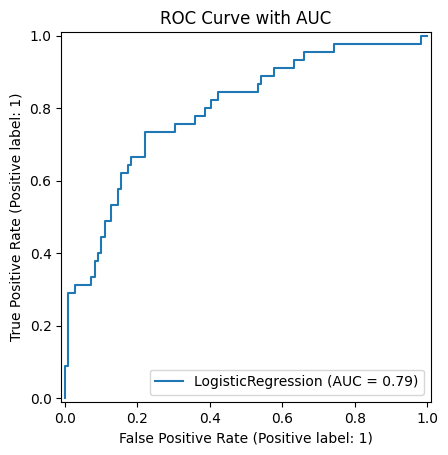

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)

plt.title("ROC Curve with AUC")
plt.show()

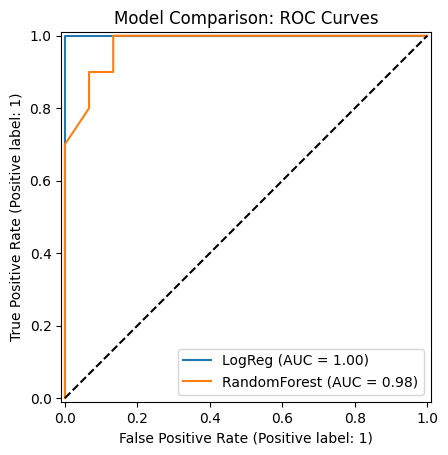

In [9]:
# comparing two models using area under roc curve
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# 1. Prepare Data & Models
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model_lr = LogisticRegression().fit(X_train, y_train)
model_rf = RandomForestClassifier().fit(X_train, y_train)

# 2. Plot the First Model
# We capture the return value (the display object) to get the 'ax'
disp = RocCurveDisplay.from_estimator(model_lr, X_test, y_test, name="LogReg")

# 3. Plot the Second Model on the SAME 'ax'
RocCurveDisplay.from_estimator(model_rf, X_test, y_test, ax=disp.ax_, name="RandomForest")

# 4. Final touches
plt.title("Model Comparison: ROC Curves")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance") # Add diagonal line
plt.show()